(0.0, 6.0, 0.0, 20.0)

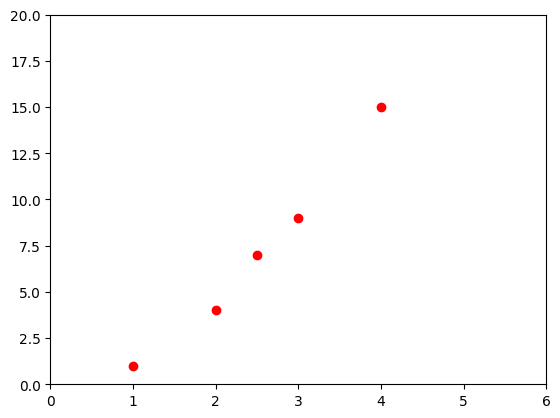

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x=[1,2,2.5,3,4]
y=[1,4,7,9,15]
plt.plot(x,y,'ro')
plt.axis([0,6,0,20])


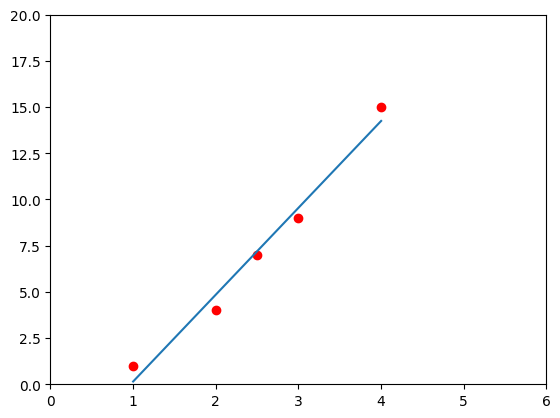

In [3]:
plt.plot (x,y,'ro')
plt.axis([0,6,0,20])
plt.plot(np.unique(x),np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
plt.show()

In [5]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 32.1 MB/s eta 0:00:0000:0100:01
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
from __future__ import absolute_import,division,print_function,unicode_literals
import pandas as pd
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

Data

In [24]:
# load dataset
dftrain= pd.read_csv('data/titanic/train.csv')
dfeval= pd.read_csv('data/titanic/gender_submission.csv')
y_train = dftrain.pop('Survived')
y_eval = dfeval.pop('Survived')


In [25]:
dftrain.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
dftrain.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
dftrain.shape

(891, 11)

In [30]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

<AxesSubplot:>

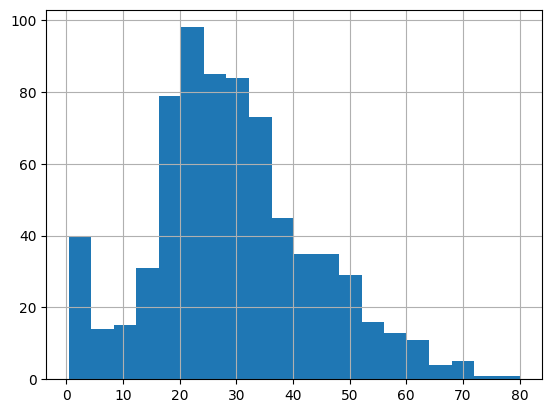

In [32]:
dftrain.Age.hist(bins=20)


<AxesSubplot:>

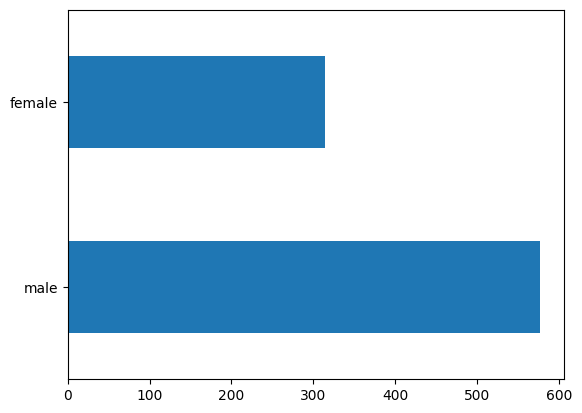

In [34]:
dftrain.Sex.value_counts().plot(kind='barh')

<AxesSubplot:>

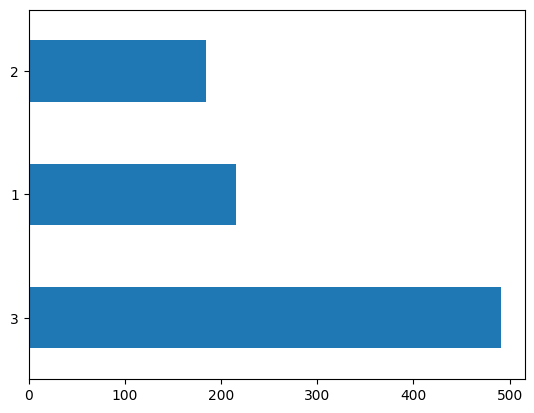

In [35]:
dftrain['Pclass'].value_counts().plot(kind='barh')


Text(0.5, 0, '% survive')

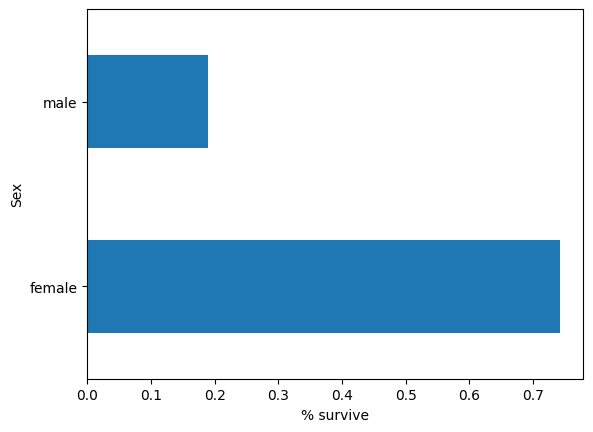

In [38]:
pd.concat([dftrain,y_train],axis=1).groupby('Sex').Survived.mean().plot(kind='barh').set_xlabel('% survive')